<center>
    <font size="5" color="steelblue"><b>Universidad Nacional de Colombia</b></font><br>
    <font size="5" color="steelblue"><b>Unidad de Informática - Facultad de Ciencias Económicas</b></font><br>
    <font size="5" color="steelblue"><b>Curso Libre Machine Learning con Python | 2023-1</b></font><br>
    <font size="5" color="steelblue"><b>Semana 5: Aprendizaje No Supervisado</b></font><br>
    <font size="5" color="steelblue"><b>Estudiante Auxiliar: Jaime Andrés Fierro Aponte</b></font><br>
</center>

# Dependencias

In [60]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Machine Learning
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import (silhouette_score)

import scipy.cluster.hierarchy as shc

# K-Means

## Datos

Tipo de objeto de las características: <class 'numpy.ndarray'>

Dimensiones de las características: (500, 2)

Primeras 5 muestras:
 [[-7.68905443  6.62034649]
 [-9.57651383 -6.93440446]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [-5.67841327 -7.28818497]]



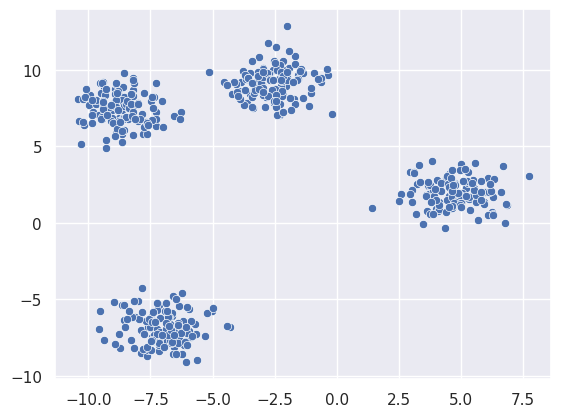

In [41]:
X_blobs, _ = make_blobs(n_samples=500,
                        centers=4,
                        random_state=42)

print(f'Tipo de objeto de las características: {type(X_blobs)}')

print(f'\nDimensiones de las características: {X_blobs.shape}')

print(f'\nPrimeras 5 muestras:\n {X_blobs[:5, :]}\n')

sns.scatterplot(x = X_blobs[:, 0], y = X_blobs[:, 1])
plt.show()

## Entrenamiento

In [37]:
# Crear instancia
k_means = KMeans(n_clusters=4, n_init=10,
                 max_iter=300, random_state=42)

# Entrenar el modelo
k_means.fit(X_blobs)

# Calcular los grupos
y = k_means.predict(X_blobs)

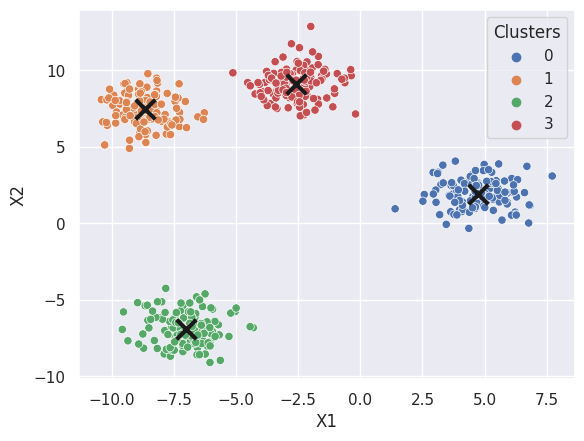

In [39]:
# Datos separados por grupos
sns.scatterplot(x=X_blobs[:,0], y=X_blobs[:,1], hue = y, palette='deep')

# Centroides
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
            marker='x', lw=3, s=200, color = 'k')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title = 'Clusters')

plt.show()

## Evaluación de grupos

### Inercia

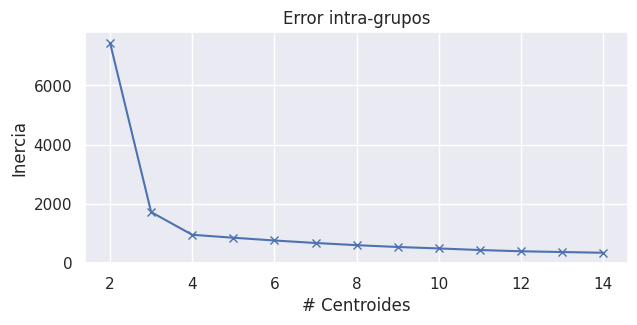

In [33]:
suma_distancias_cuadrado = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k,  n_init=10,
              max_iter=300, random_state=42)
  km = km.fit(X_blobs)
  suma_distancias_cuadrado.append(km.inertia_)

plt.figure(figsize=(7, 3))
plt.plot(K, suma_distancias_cuadrado, 'bx-')
plt.title('Error intra-grupos')
plt.xlabel('# Centroides')
plt.ylabel('Inercia')
plt.show()

### Coeficiente de Silueta

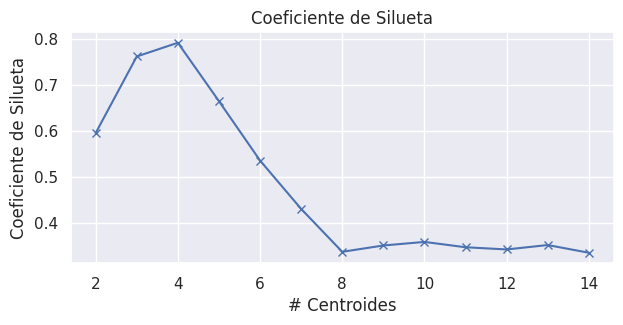

In [40]:
coeficiente_silueta = []

K = range(2, 15)
for k in K:
  km = KMeans(n_clusters=k,  n_init=10,
              max_iter=300, random_state=42)
  km = km.fit(X_blobs)
  y = km.predict(X_blobs)
  l = km.labels_
  coeficiente_silueta.append(silhouette_score(X_blobs, y))

plt.figure(figsize=(7, 3))
plt.plot(K, coeficiente_silueta, 'bx-')
plt.title('Coeficiente de Silueta')
plt.xlabel('# Centroides')
plt.ylabel('Coeficiente de Silueta')
plt.show()

## Ejercicio

Determine la cantidad de grupos apropiada para el siguiente conjunto de datos. Después grafique los datos mostrando cada grupo con un color distinto e indicando los centroides de cada grupo.

Tipo de objeto de las características: <class 'numpy.ndarray'>

Dimensiones de las características: (500, 2)

Primeras 5 muestras:
 [[  3.21156612   3.92341699]
 [-10.45758244  -1.46969605]
 [-10.94423558  -2.80373551]
 [  2.9529592    1.99251072]
 [  3.81775935   4.02277267]]



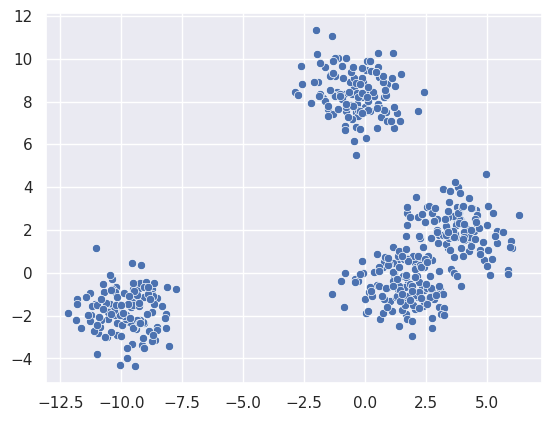

In [42]:
X_blobs_ex, _ = make_blobs(n_samples=500,
                           centers=4,
                           random_state=246)

print(f'Tipo de objeto de las características: {type(X_blobs_ex)}')

print(f'\nDimensiones de las características: {X_blobs_ex.shape}')

print(f'\nPrimeras 5 muestras:\n {X_blobs_ex[:5, :]}\n')

sns.scatterplot(x = X_blobs_ex[:, 0], y = X_blobs_ex[:, 1])
plt.show()

In [ ]:
# ------ ELIMINE ESTA LÍNEA Y ESCRIBA SU CÓDIGO AQUÍ ------

# Cluster Jerárquico

## Datos

Tipo de objeto de las características: <class 'numpy.ndarray'>

Dimensiones de las características: (500, 2)

Primeras 5 muestras:
 [[ 0.89854939 -0.48137657]
 [ 0.01333222  0.91401225]
 [-1.07432961  0.10313456]
 [-0.41024529  0.9402069 ]
 [ 0.24340844 -0.08868165]]



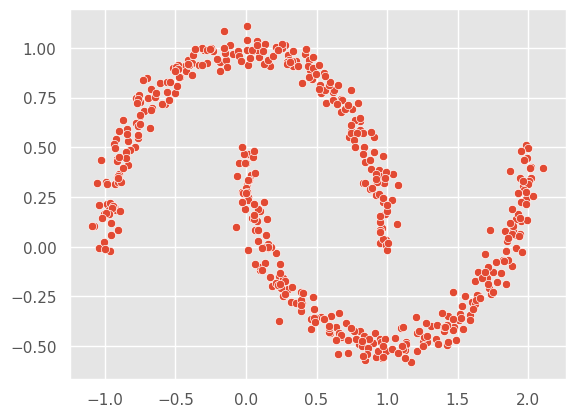

In [56]:
X_moons, _ = make_moons(500, noise=0.05)

print(f'Tipo de objeto de las características: {type(X_moons)}')

print(f'\nDimensiones de las características: {X_moons.shape}')

print(f'\nPrimeras 5 muestras:\n {X_moons[:5, :]}\n')

sns.scatterplot(x = X_moons[:, 0], y = X_moons[:, 1])
plt.show()

Tipo de objeto de las características: <class 'numpy.ndarray'>

Dimensiones de las características: (500, 2)

Primeras 5 muestras:
 [[ 0.47545626 -0.29510885]
 [ 0.36571975  0.83152633]
 [-0.86588899  0.4489224 ]
 [-0.24904957  0.93356077]
 [-0.37698606  0.317471  ]]



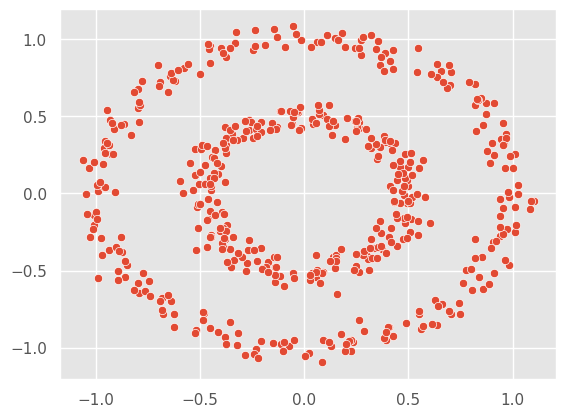

In [66]:
X_circles, _ = make_circles(500, noise=0.05, factor=0.5)

print(f'Tipo de objeto de las características: {type(X_circles)}')

print(f'\nDimensiones de las características: {X_circles.shape}')

print(f'\nPrimeras 5 muestras:\n {X_circles[:5, :]}\n')

sns.scatterplot(x = X_circles[:, 0], y = X_circles[:, 1])
plt.show()

## Entrenamiento

### K-Means

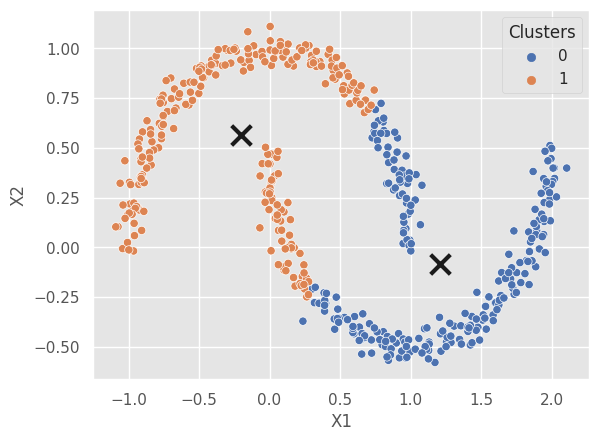

In [78]:
# Crear instancia
k_means_moons = KMeans(n_clusters=2, n_init=10,
                       max_iter=300, random_state=42)

# Entrenar el modelo
k_means_moons.fit(X_moons)

# Calcular los grupos
y = k_means_moons.predict(X_moons)

# Datos separados por grupos
sns.scatterplot(x=X_moons[:,0], y=X_moons[:,1], hue = y, palette='deep')

# Centroides
plt.scatter(k_means_moons.cluster_centers_[:,0],
            k_means_moons.cluster_centers_[:,1],
            marker='x', lw=3, s=200, color = 'k')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title = 'Clusters')

plt.show()

### Jerárquico

In [81]:
# Crear la instancia
jerarq = AgglomerativeClustering(n_clusters=2, linkage='ward',
                                 metric='euclidean')

# Entrenamiento del modelo y cálculo de grupos
# jerarq_clusters = jerarq.fit(X_circles)

# Clusters
# y = jerarq_clusters.labels_

y = jerarq.fit_predict(X_moons)

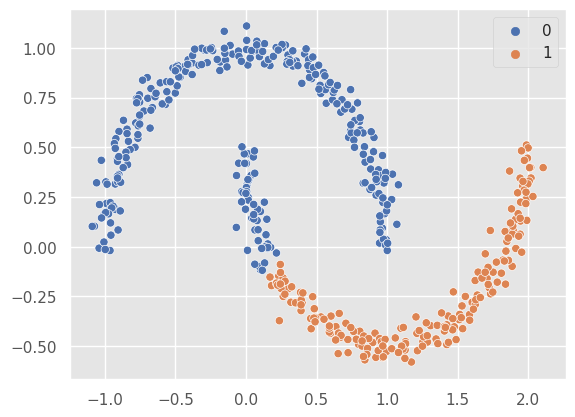

In [84]:
# Datos separados por grupos
sns.scatterplot(x=X_moons[:,0], y=X_moons[:,1],
                hue=y, palette='deep')
plt.show()

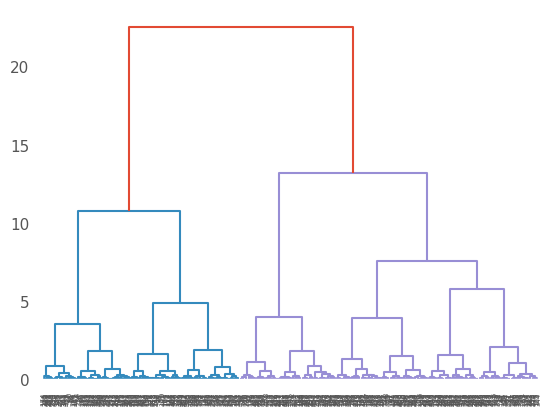

In [86]:
# Dendrograma
linkage = shc.linkage(X_moons, method ='ward', metric='euclidean')
shc.dendrogram(linkage)
plt.show()